<a href="https://colab.research.google.com/github/vedikajain2004/btech_grad_project/blob/main/minor_project_codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

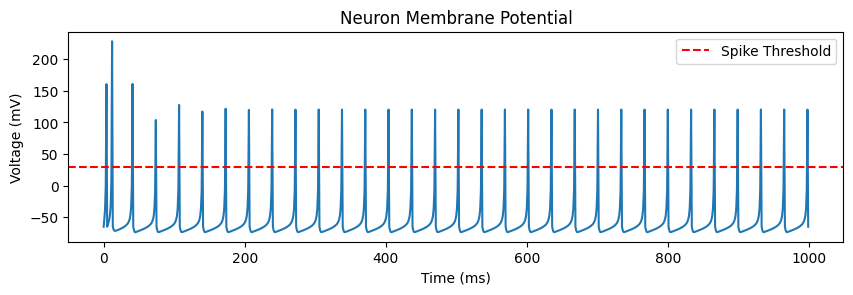

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Izhikevich Neuron Model
a = 0.02
b = 0.2
c = -65
d = 8
Vth = 30  # Spike threshold
Vreset = -65
I = 15  # Input current
dt = 1.0  # time step (ms)
T = 1000  # total simulation time (ms)
time = np.arange(0, T, dt)

# Initializing variables for the neuron
v = Vreset * np.ones_like(time)  # Membrane potential
u = b * v  # Recovery variable
spikes = []  # Store spike times

# Simulate the Izhikevich neuron
for t in range(1, len(time)):
    if v[t-1] >= Vth:
        v[t] = c  # Reset voltage
        u[t] = u[t-1] + d
        spikes.append(t)
    else:
        dv = 0.04 * v[t-1]**2 + 5 * v[t-1] + 140 - u[t-1] + I
        du = a * (b * v[t-1] - u[t-1])
        v[t] = v[t-1] + dv * dt
        u[t] = u[t-1] + du * dt

# Plot the neuron’s membrane potential and spikes
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time, v)
plt.title('Neuron Membrane Potential')
plt.axhline(Vth, color='r', linestyle='--', label="Spike Threshold")
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.legend()

In [ ]:
# STDP Parameters
A_plus = 0.005
A_minus = -0.005
tau_plus = 20.0
tau_minus = 20.0

#potentiation spikes
pre_time_p = 5
post_time_p = 15

#depression spikes
pre_time_d = 17
post_time_d = 8

# Synaptic weight (initial)
w_i_p = 0.5
w_i_d = 0.5

dt_p = post_time_p - pre_time_p
w_f_p = w_i_p + A_plus * 2 ** (1.4375 * (-dt_p / tau_plus))  # Potentiation

dt_d = post_time_d - pre_time_d
w_f_d = w_i_d + A_minus * 2 ** (1.4375 * (dt_d / tau_minus))  # Depression

print('initial weight =', w_i_p)
print('post potentiation weight =', w_f_p)
print('post depression weight =', w_f_d)

initial weight = 0.5
post potentiation weight = 0.5030381183999512
post depression weight = 0.4968066889346772


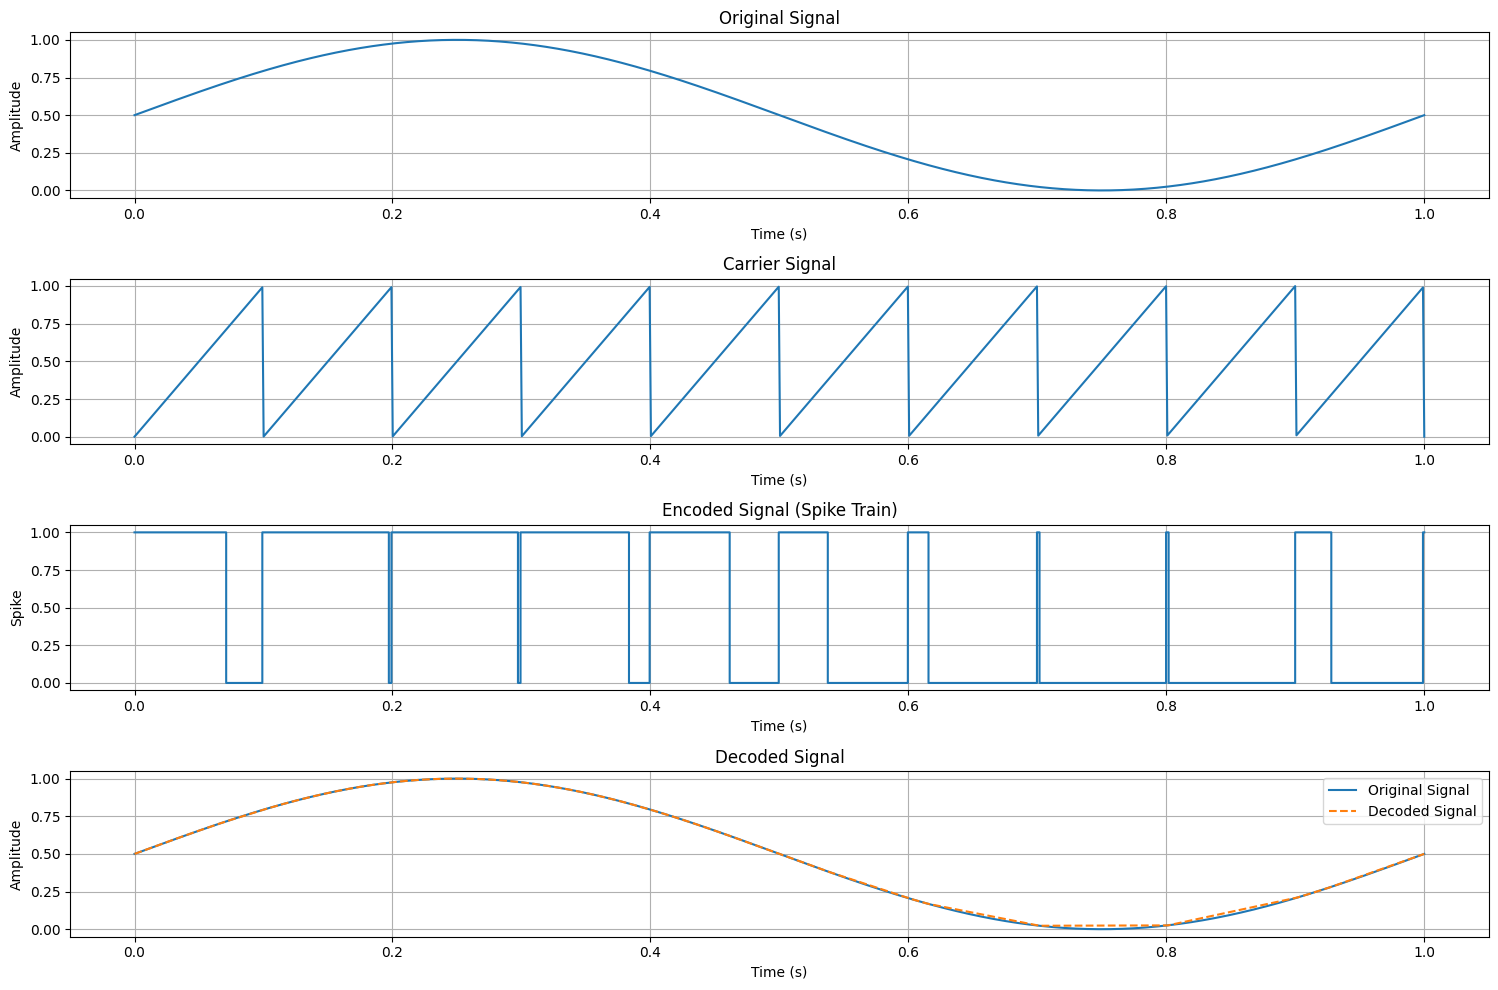

In [ ]:
# Step 1: Define the reference signal (e.g., a sine wave)
def reference_signal(t):
    return 0.5 * np.sin(2 * np.pi * 1 * t) + 0.5  # Sine wave in [0, 1]

# Step 2: Generate the carrier signal (sawtooth wave)
def carrier_signal(t, frequency):
    return (t * frequency) % 1

# Step 3: PWM encoding
def pwm_encode(reference, carrier):
    spikes = reference > carrier
    return spikes

# Step 4: PWM decoding
def pwm_decode(spikes, carrier):
    decoded_points = carrier[spikes]
    return decoded_points

# Step 5: Reconstruct the signal from decoded points
def reconstruct_signal(decoded_points, t):
    interpolated_signal = np.interp(t, t[decoded_points], reference_signal(t)[decoded_points])
    return interpolated_signal

# Parameters
sampling_rate = 1000  # Hz
duration = 1  # second
time = np.linspace(0, duration, sampling_rate * duration)
carrier_freq = 10  # Hz

# Signals
ref_signal = reference_signal(time)
carrier = carrier_signal(time, carrier_freq)

# Encoding
spike_train = pwm_encode(ref_signal, carrier)

# Decoding
decoded_points = np.where(spike_train)[0]
decoded_signal = reconstruct_signal(decoded_points, time)

# Plotting
plt.figure(figsize=(15, 10))

# Original Signal
plt.subplot(4, 1, 1)
plt.plot(time, ref_signal, label="Original Signal")
plt.title("Original Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

# Carrier Signal
plt.subplot(4, 1, 2)
plt.plot(time, carrier, label="Carrier Signal")
plt.title("Carrier Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

# Encoded Signal
plt.subplot(4, 1, 3)
plt.plot(time, spike_train, label="Spike Train", drawstyle='steps-pre')
plt.title("Encoded Signal (Spike Train)")
plt.xlabel("Time (s)")
plt.ylabel("Spike")
plt.grid()

# Decoded Signal
plt.subplot(4, 1, 4)
plt.plot(time, ref_signal, label="Original Signal")
plt.plot(time, decoded_signal, label="Decoded Signal", linestyle='dashed')
plt.title("Decoded Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()